# NEU-PCA: MNIST
- Designed and Coded by: [Anastasis Kratsios](https://people.math.ethz.ch/~kratsioa/).
- Some Elements of the PCA analysis are forked from [this repo](https://github.com/radmerti/MVA2-PCA/blob/master/YieldCurvePCA.ipynb).

## Parameters

In [1]:
PCA_Rank = 2

## Imports

In [2]:
# First Round Initializations (Global Level) #
#============================================#
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())
# Initialize "First Run Mode"
First_run = True

Using TensorFlow backend.


Parameter Grids Build and Loaded!
Complete NEU-Structure Building Procedure!!!
Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN (Fully Coupled) Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-PCA Training Procedure!!!


In [3]:
import pylab as plt
import numpy as np
import seaborn as sns; sns.set()

import sklearn
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import decomposition
import scipy

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Layer, InputSpec
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers, activations, initializers, constraints, Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.constraints import UnitNorm, Constraint

from numpy.random import seed

### Fix Seeds for Reproducability

In [4]:
# Numpy
np.random.seed(2020)
# Tensorflow
tf.random.set_seed(2020)
# Python's Seed
random.seed(2020)

## Load Data

In [5]:
from tensorflow.keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784) / 255
X_test = X_test.reshape(10000, 784) / 255

#### Pre-Process Data

In [6]:
# Initialize Scaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# Train Scaler
X_train_scaled = scaler.transform(X_train)
# Map to Test Set
X_test_scaled = scaler.transform(X_test)

In [7]:
# # ## TEMPS!!
is_visuallty_verbose = True
# First_run = False

---

# Benchark(s)
---

## Get PCAs

In [8]:
# Reconstruct Training Data
Zpca,Zpca_test,Rpca,Rpca_test = get_PCAs(X_train_scaled=X_train_scaled,
                                         X_test_scaled=X_test_scaled,
                                         PCA_Rank=PCA_Rank)

#### Get Reconstruction Result(s)

In [27]:
# Get Results #
#-------------#
## Compute
PCA_Reconstruction_results = reporter_array(Rpca,Rpca_test,X_train,X_test)
## Organize
### Train
Performance_Results_train = pd.DataFrame(PCA_Reconstruction_results['Train'],index=PCA_Reconstruction_results.index)
Performance_Results_train.columns=['PCA']
### Test
Performance_Results_test = pd.DataFrame(PCA_Reconstruction_results['Test'],index=PCA_Reconstruction_results.index)
Performance_Results_test.columns=['PCA']

# Update Total Results #
#----------------------#
# NA

# Save Results #
#--------------#
Performance_Results_train.to_latex('outputs/tables/MNIST_Performance_train.txt')
Performance_Results_test.to_latex('outputs/tables/MNIST_Performance_test.txt')

## Get (ReLU) Auto-Encoder

In [17]:
n_jobs = -1
n_iter = 10
Autoencoder_dictionary = {'batch_size': [16,32],
                          'epochs': [7,9,20],
                          'learning_rate': [0.005,0.001,]}

In [18]:
AE_Reconstructed_train, AE_Reconstructed_test, AE_Factors_train = build_autoencoder(CV_folds,
                                                                                    n_jobs,
                                                                                    n_iter,
                                                                                    X_train_scaled,
                                                                                    X_train,
                                                                                    X_test_scaled,
                                                                                    PCA_Rank)

Begin autoencoder Training
Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed: 24.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 27.4min finished


We use a DNN of depth: 13
Epoch 1/20
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0500 - accuracy: 0.0116
Epoch 2/20
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0420 - accuracy: 0.0115
Epoch 3/20
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0401 - accuracy: 0.0110
Epoch 4/20
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0390 - accuracy: 0.0111
Epoch 5/20
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0382 - accuracy: 0.0120
Epoch 6/20
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0377 - accuracy: 0.0132
Epoch 7/20
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0372 - accuracy: 0.0127
Epoch 8/20
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0368 - accuracy: 0.0123
Epoch 9/20
3750/3750 [==============================] - 21s 6ms/step - loss: 0.0365 - accuracy: 0.0129
Epoch 10/20
3750/3750 [========================

#### Get Reconstruction Result(s)

In [30]:
# Get Results #
#-------------#
## Compute
AE_Reconstruction_results = reporter_array(AE_Reconstructed_train,AE_Reconstructed_test,X_train,X_test)
## Organize
### Train
AE_Performance_Results_train = pd.DataFrame(AE_Reconstruction_results['Train'],index=AE_Reconstruction_results.index)
AE_Performance_Results_train.columns=['AE']
### Test
AE_Performance_Results_test = pd.DataFrame(AE_Reconstruction_results['Test'],index=AE_Reconstruction_results.index)
AE_Performance_Results_test.columns=['AE']

# Update Total Results #
#----------------------#
Performance_Results_train = pd.concat([Performance_Results_train,AE_Performance_Results_train],axis=1)
Performance_Results_test = pd.concat([Performance_Results_test,AE_Performance_Results_test],axis=1)

# Save Results #
#--------------#
Performance_Results_train.to_latex('outputs/tables/MNIST_Performance_train.txt')
Performance_Results_test.to_latex('outputs/tables/MNIST_Performance_test.txt')

# NEU

In [71]:
epochs = 2
input_dim = X_train_scaled.shape[1]
learning_rate = 0.001
NEU_PCA_depth = 1
#--------------------------------------------------#
# Build Regular Arch.
#--------------------------------------------------#
#-###################-#
# Define Model Input -#
#-###################-#
input_layer = tf.keras.Input(shape=(input_dim,))


#----------------------#
# Core Layers: Encoder #
#----------------------#
encoder = fullyConnected_Dense(PCA_Rank)(input_layer)

#----------------------#
# Core Layers: Decoder #
#----------------------#
# PCA Readout (Really this is the OLS model)
decoder = fullyConnected_Dense(input_dim)(encoder)


# Define Input/Output Relationship (Arch.)
NEU_PCA = tf.keras.Model(input_layer, decoder)
#--------------------------------------------------#
# Define Optimizer & Compile Archs.
#----------------------------------#
opt = Adam(lr=learning_rate)
NEU_PCA.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='Adam')

NEU_PCA.fit(X_train,X_train,epochs=epochs)

Epoch 1/2
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0597 - accuracy: 0.0124
Epoch 2/2
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0568 - accuracy: 0.0153


In [72]:
# Get Principal Components
NEU_PCA_get_Factors = tf.keras.Model(inputs=NEU_PCA.inputs, outputs=NEU_PCA.layers[NEU_PCA_depth].output)
NEU_Principal_components = np.array(NEU_PCA_get_Factors.predict(X_train_scaled))
# Get Reconstructions
NEU_PCA_Reconstruction_train = NEU_PCA.predict(X_train_scaled)
NEU_PCA_Reconstruction_test = NEU_PCA.predict(X_test_scaled)

# Visualize Results

### Feature Space(s)

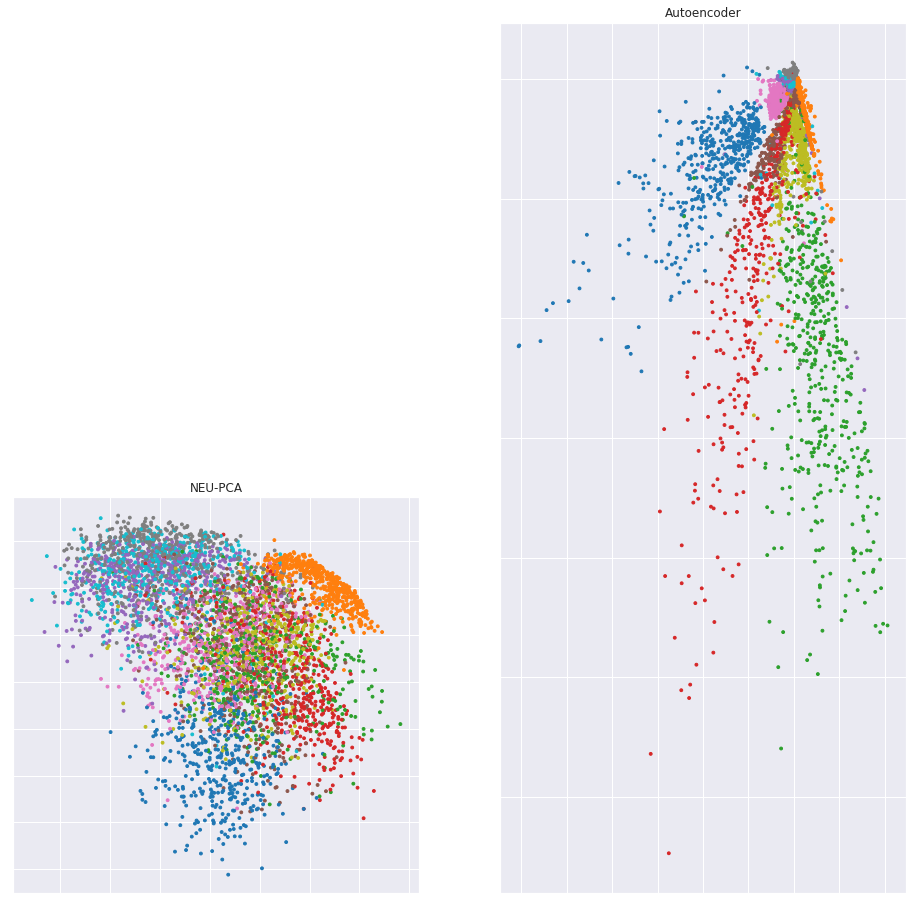

In [66]:
plt.figure(figsize=(16,16))
plt.subplot(121)
plt.title('PCA')
plt.scatter(Zpca[:5000,0], Zpca[:5000,1], c=Y_train[:5000], s=8, cmap='tab10')
plt.gca().get_xaxis().set_ticklabels([])
plt.gca().get_yaxis().set_ticklabels([])

plt.subplot(122)
plt.title('Autoencoder')
plt.scatter(AE_Factors_train[:5000,0], AE_Factors_train[:5000,1], c=Y_train[:5000], s=8, cmap='tab10')
plt.gca().get_xaxis().set_ticklabels([])
plt.gca().get_yaxis().set_ticklabels([])

plt.subplot(223)
plt.title('NEU-PCA')
plt.scatter(NEU_Principal_components[:5000,0], NEU_Principal_components[:5000,1], c=Y_train[:5000], s=8, cmap='tab10')
plt.gca().get_xaxis().set_ticklabels([])
plt.gca().get_yaxis().set_ticklabels([])


# plt.tight_layout()

# Save Results
plt.savefig('outputs/plotsANDfigures/Results_Visualization_MNIST.pdf')

## Reconstruction(s)

#### Testing

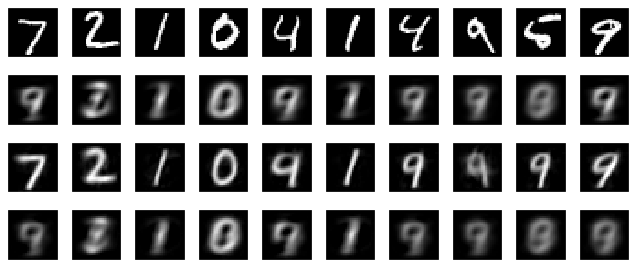

In [75]:
plt.figure(figsize=(9,4))
toPlot = (X_test, Rpca_test, AE_Reconstructed_test, NEU_PCA_Reconstruction_test)
for i in range(10):
    for j in range(4):
        ax = plt.subplot(4, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()

# Save Results
plt.savefig('outputs/plotsANDfigures/Results_Visualization_MNIST_Reconstruction_test.pdf')

#### Training

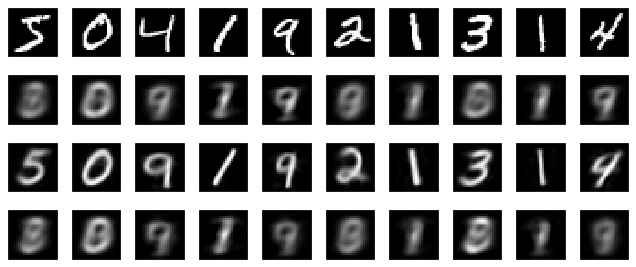

In [76]:
plt.figure(figsize=(9,4))
toPlot = (X_train, Rpca, AE_Reconstructed_train, NEU_PCA_Reconstruction_train)
for i in range(10):
    for j in range(4):
        ax = plt.subplot(4, 10, 10*j+i+1)
        plt.imshow(toPlot[j][i,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()

# Save Results
plt.savefig('outputs/plotsANDfigures/Results_Visualization_MNIST_Reconstruction_train.pdf')

---

## Numerical Summary

#### Testing Results

In [33]:
print(np.round(Performance_Results_test,4))
Performance_Results_test

             PCA      AE
Er. 95L   0.0002 -0.0013
Er. Mean  0.0007 -0.0008
Er. 95U   0.0012 -0.0002
MAE       0.1306  0.0898
MSE       0.0557  0.0355


,PCA,AE
Er. 95L,0.000224,-0.001349
Er. Mean,0.000704,-0.000782
Er. 95U,0.001186,-0.000216
MAE,0.130594,0.089837
MSE,0.055669,0.035537


#### Training Results

In [32]:
print(np.round(Performance_Results_train,4))
Performance_Results_train

             PCA      AE
Er. 95L  -0.0002 -0.0024
Er. Mean -0.0000 -0.0022
Er. 95U   0.0002 -0.0020
MAE       0.1307  0.0887
MSE       0.0560  0.0345


,PCA,AE
Er. 95L,-0.000196,-0.002438
Er. Mean,-0.000002,-0.002214
Er. 95U,0.000192,-0.001993
MAE,0.130745,0.088675
MSE,0.055953,0.034520


---
# Fin
---